# UNITED TRACTOR AS BEST GROWTH STOCK

In [30]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('fivethirtyeight')

In [31]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2018, 1, 1)

df = web.DataReader('UNTR', 'google', start, end)

print(df.head())

/home/doni/anaconda3/envs/stock-ticker/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


               Open     High      Low    Close   Volume
Date                                                   
2010-01-04  15500.0  15850.0  15500.0  15700.0  5284000
2010-01-05  15900.0  16200.0  15750.0  16100.0  7508500
2010-01-06  16200.0  16300.0  15850.0  16050.0  3867000
2010-01-07  16100.0  16200.0  15700.0  15850.0  3985500
2010-01-08  16000.0  16400.0  15900.0  16400.0  4929000


In [32]:
close = df['Close']

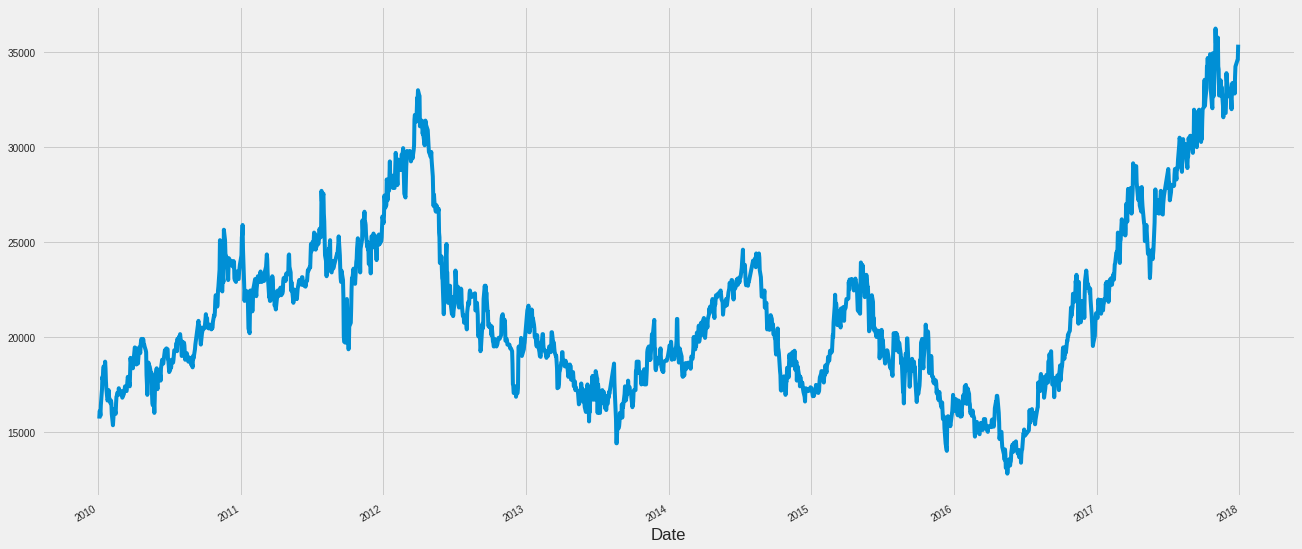

In [33]:
close.plot()

In [34]:
close_df = close.reset_index().rename(columns={'Date':'ds', 'Close':'y'})
close_df['y'] = np.log(close_df['y'])

In [35]:
model = Prophet()
model.fit(close_df)
future = model.make_future_dataframe(periods=1825) #forecasting for 5 year from now.
forecast = model.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/doni/anaconda3/envs/stock-ticker/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


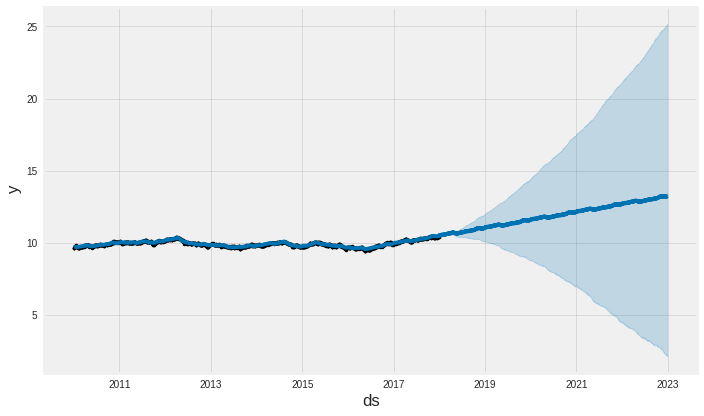

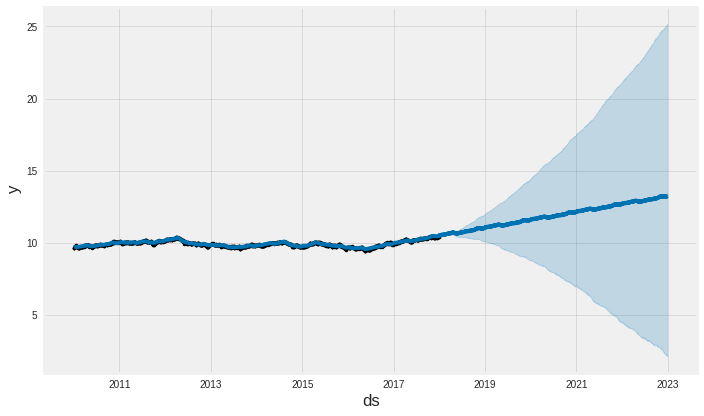

In [36]:
model.plot(forecast)

In [37]:
two_years = forecast.set_index('ds').join(df)
two_years = two_years[['Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)

In [38]:
two_years

,Close,yhat,yhat_upper,yhat_lower
ds,,,,
2014-09-18,20775.0,20829.587415,22100.547629,19645.380112
2014-09-19,21150.0,20714.328561,21910.837593,19510.410372
2014-09-22,20950.0,20363.103733,21613.808082,19300.315413
2014-09-23,20475.0,20298.684687,21456.516469,19214.244747
2014-09-24,20600.0,20268.501524,21550.289963,19142.143580
2014-09-25,20675.0,20139.711616,21372.156040,19038.395338
2014-09-26,20150.0,20016.225452,21203.265257,18884.947187
2014-09-29,20100.0,19665.396797,20913.425418,18538.661942
2014-09-30,19900.0,19608.190387,20749.044012,18536.854233


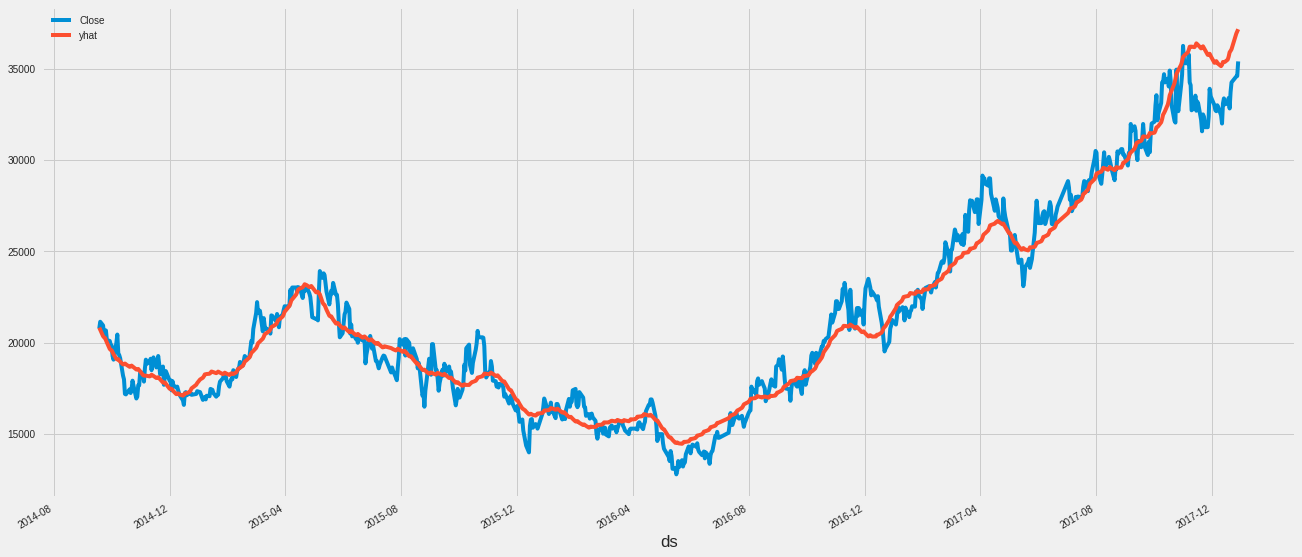

In [39]:
two_years[['Close', 'yhat']].plot()



In [40]:
two_years_AE = (two_years.yhat - two_years.Close)
print(two_years_AE.describe())



count     800.000000
mean      -13.217759
std      1138.544212
min     -3405.451285
25%      -672.025918
50%        -5.938094
75%       601.081711
max      4564.772005
dtype: float64


In [41]:
r2_score(two_years.Close, two_years.yhat)

0.9581175698840048

In [42]:
mean_squared_error(two_years.Close, two_years.yhat)

1294837.277811363

In [43]:
mean_absolute_error(two_years.Close, two_years.yhat)

857.3756125870708

Text(0.5,0,'Date')

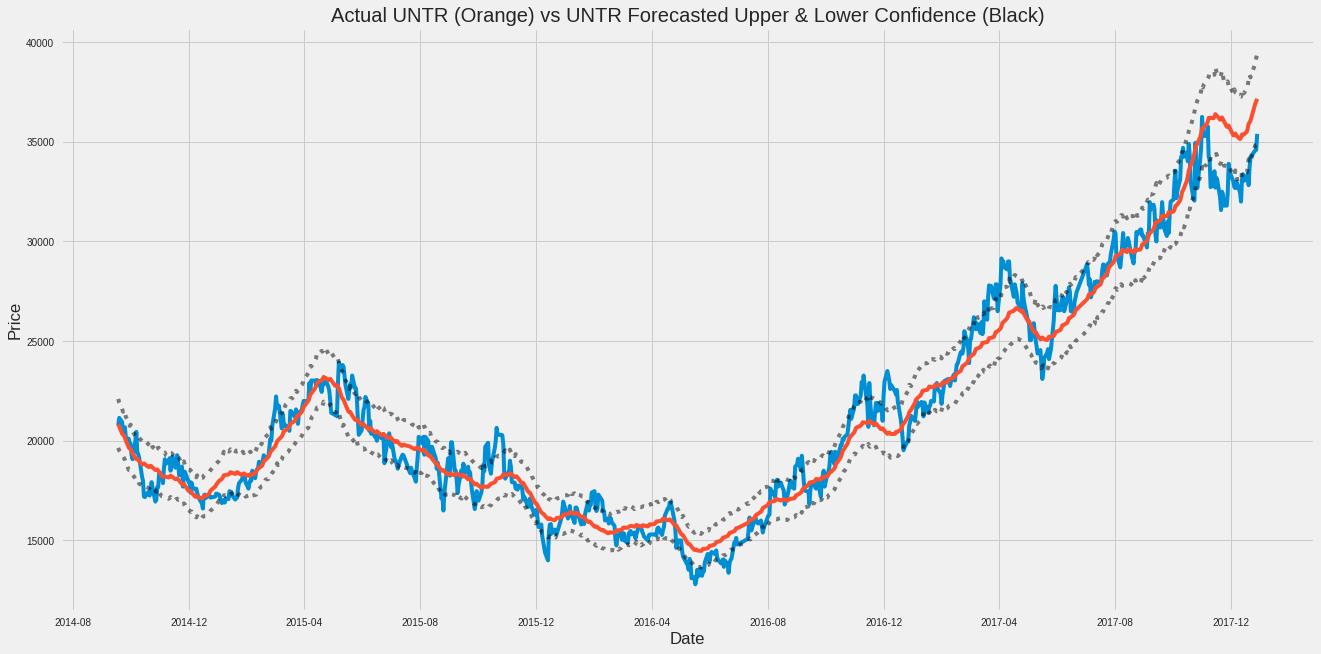

In [44]:
fig, ax1 = plt.subplots()
ax1.plot(two_years.Close)
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('Actual UNTR (Orange) vs UNTR Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')